In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics

# Data Exploraion & Engineering

In [2]:
df = pd.read_excel("GrocaryItemsWithSubCategory.xlsx")
df

,itemName,category
0,جبنة كيري مربعات - 12 قطعة,منتجات الألبان و البيض
1,لمار حليب كامل الدسم - 1 لتر,منتجات الألبان و البيض
2,جبنة رومي بطارخ,منتجات الألبان و البيض
3,جبنة فيتا بالزيتون دومتي - 1 كجم,الأطعمة المبردة
4,لبن المراعي كامل الدسم - 1 لتر,منتجات الألبان و البيض
...,...,...
12055,قطعة ريكفورد 100جم Danablu Cheese,منتجات الألبان و البيض
12056,صلصة طماطم درة &#8211; 650جم,مكونات الطبخ
12057,زيت كريستال ذرة 2.2لتر,مكونات الطبخ
12058,ايس كريم كرنفاليتا فانيليا عائلى,ايس كريم وحلويات


In [3]:
df.itemName= df.itemName.replace(r'\r','', regex=True) 
df.itemName= df.itemName.replace(r'\n','', regex=True)

In [4]:
print(' number of elements in each class')
df.groupby('category').category.count().sort_values()

 number of elements in each class


category
منتجات الأسماك المجمدة                     4
مشروبات بودرة                             57
منتجات العجين المجمدة                     65
مشروبات الأطفال                           69
ايس كريم وحلويات                          71
السكر والمخبوزات المنزلية                 76
التبغ                                     93
الأطعمة المبردة                          107
منتجات الدجاج المجمدة                    127
المكسرات والتمر والفواكه المجففة         152
الخضار المجمد                            159
المياه                                   179
شيبس ومقبلات                             210
أطعمة عضوية وبدون جيلوتين                273
منتجات اللحوم المجمدة                    279
المعلبات والبرطمانات                     393
الأرز والمكرونة والبقوليات والشعيرية     396
حبوب وألواح الإفطار                      502
مشروبات خفيفة                            665
المربى والأطعمة السبريد والسيروب         689
البسكويت والمقرمشات والكيك               715
العصائر                                  727
م

In [5]:
subCategory_0= df.loc[df['category'] == 'الشوكولاتة والحلويات']
print(subCategory_0)
subCategory_0= subCategory_0.sample(n = 800, replace = True)
subCategory_0.shape

                                                itemName              category
63                         بودينج شيكولاتة دانيت - 100جم  الشوكولاتة والحلويات
82                          بودينج فانيليا دانيت - 100جم  الشوكولاتة والحلويات
333                بار شوكولاتة كراميل من ميلكا - 100 جم  الشوكولاتة والحلويات
364                شيكولاتة جالكسي - 36 جم - عبوة من 4+1  الشوكولاتة والحلويات
372    شوكولاتة بابلي من كادبوري ديري ميلك، 28 جرام -...  الشوكولاتة والحلويات
...                                                  ...                   ...
11895                                  GINIS BISCUIT TEA  الشوكولاتة والحلويات
11896                         RAZZ CUP CAKE CHOCOLATE 1P  الشوكولاتة والحلويات
11950                    هولز &#8211; ليمون &#8211; 12 ق  الشوكولاتة والحلويات
11968                       هاريبو جيلي شكل الدب | 17 جم  الشوكولاتة والحلويات
12021                           جيلي كولا مستر جيلو بـ1ج  الشوكولاتة والحلويات

[1786 rows x 2 columns]


(800, 2)

In [6]:
subCategory_1= df.loc[df['category'] == 'منتجات الألبان و البيض']
print(subCategory_1)
subCategory_1= subCategory_1.sample(n = 800, replace = True)
subCategory_1.shape

                                                itemName  \
0                             جبنة كيري مربعات - 12 قطعة   
1                           لمار حليب كامل الدسم - 1 لتر   
2                                        جبنة رومي بطارخ   
4                         لبن المراعي كامل الدسم - 1 لتر   
5              لبن لاكتيل كامل الدسم - 1 لتر - عبوة من 6   
...                                                  ...   
12034             جبنة بريزيدون فيتا جبن ابيض طري 500 جم   
12038  ميكس جبن دومتي 300جرام ميكس موزاريلا وجودة و شيدر   
12046                           موزاريلا الدمياطي 250 جم   
12054             لاكتيل زبادي يوناني بالتشيز كيك 180 جم   
12055                  قطعة ريكفورد 100جم Danablu Cheese   

                     category  
0      منتجات الألبان و البيض  
1      منتجات الألبان و البيض  
2      منتجات الألبان و البيض  
4      منتجات الألبان و البيض  
5      منتجات الألبان و البيض  
...                       ...  
12034  منتجات الألبان و البيض  
12038  منتجات الألبان و

(800, 2)

In [7]:
subCategory_2= df.loc[df['category'] == 'المخبوزات']
print(subCategory_2)
subCategory_2= subCategory_2.sample(n = 800, replace = True)
subCategory_2.shape

                               itemName   category
354                  كوكس فانيليا - 1جم  المخبوزات
368              كوكس بيكنج بودر - 16جم  المخبوزات
370       خميرة فورية جافة دريم - 11 جم  المخبوزات
411                 دريم كيك شيف - 18جم  المخبوزات
425                بقسماط الضحي - 300جم  المخبوزات
...                                 ...        ...
11880  توست مقرمش ريتش بيك سادة - 170جم  المخبوزات
11881        بقسماط مطحون برانش - 250جم  المخبوزات
11889            فوجتشا بالجبنه - 250جم  المخبوزات
11890            فوجتشا بالزعتر - 250جم  المخبوزات
11892      بقسماط اسبيشيال - باكيت كبير  المخبوزات

[1189 rows x 2 columns]


(800, 2)

In [8]:
subCategory_3= df.loc[df['category'] == 'الشاي والقهوة']
print(subCategory_3)
subCategory_3= subCategory_3.sample(n = 800, replace = True)
subCategory_3.shape

                                            itemName       category
768                ويزرس اوريجينال بونبون كريمى 125ج  الشاي والقهوة
1064              حلوي زبدة ويرثيرز أوريجينال - 50جم  الشاي والقهوة
1233   برطمان نسكافيه كلاسيك سريع التحضير - 100 جرام  الشاي والقهوة
1235     نسكافيه كلاسيك - قهوة فورية - عبوة 200 جرام  الشاي والقهوة
1236     برطمان نسكافيه جولد سريع التحضير - 100 جرام  الشاي والقهوة
...                                              ...            ...
11992                           نسكافيه 3*1 شيكولاته  الشاي والقهوة
11998                              شاي الكبوس 100 جم  الشاي والقهوة
12024                               نسكافيه ميلك 3*1  الشاي والقهوة
12025                 علبة نسكافيه ميلك 3*1 | 12 كيس  الشاي والقهوة
12037                        علبة نسكافيه ريتش 21 جم  الشاي والقهوة

[1017 rows x 2 columns]


(800, 2)

In [9]:
#labels = df.category.unique()
df = df[df.category != 'منتجات الأسماك المجمدة' ]
df = df[df.category != 'مشروبات بودرة' ]
df = df[df.category != 'منتجات العجين المجمدة' ]
df = df[df.category != 'مشروبات الأطفال' ]
df = df[df.category != 'ايس كريم وحلويات' ]
df = df[df.category != 'السكر والمخبوزات المنزلية' ]
df = df[df.category != 'التبغ' ]
df = df[df.category != 'الأطعمة المبردة' ]
df = df[df.category != 'منتجات الدجاج المجمدة' ]
df = df[df.category != 'المكسرات والتمر والفواكه المجففة' ]
df = df[df.category != 'الخضار المجمد' ]
df = df[df.category != 'المياه' ]
df = df[df.category != 'شيبس ومقبلات' ]
df = df[df.category != 'أطعمة عضوية وبدون جيلوتين' ]
df = df[df.category != 'منتجات اللحوم المجمدة' ]
df = df[df.category != 'المعلبات والبرطمانات' ]
df = df[df.category != 'الأرز والمكرونة والبقوليات والشعيرية' ]
df = df[df.category != 'حبوب وألواح الإفطار' ]
#df = df[df.category != 'مشروبات خفيفة' ]
#df = df[df.category != 'المربى والأطعمة السبريد والسيروب' ]
#df = df[df.category != 'البسكويت والمقرمشات والكيك' ]
#df = df[df.category != 'العصائر' ]
#df = df[df.category != 'مكونات الطبخ' ]
df = df[df.category != 'الشاي والقهوة' ]
df = df[df.category != 'المخبوزات' ]
df = df[df.category != 'منتجات الألبان و البيض' ]
df = df[df.category != 'الشوكولاتة والحلويات' ]
print(df.groupby('category').category.count().sort_values())
print(df.shape)

category
مشروبات خفيفة                       665
المربى والأطعمة السبريد والسيروب    689
البسكويت والمقرمشات والكيك          715
العصائر                             727
مكونات الطبخ                        797
Name: category, dtype: int64
(3593, 2)


In [10]:
df= df.append(subCategory_0)
df= df.append(subCategory_1)
df= df.append(subCategory_2)
df= df.append(subCategory_3)

In [11]:
print(' number of elements in each class')
df.groupby('category').category.count().sort_values()

 number of elements in each class


category
مشروبات خفيفة                       665
المربى والأطعمة السبريد والسيروب    689
البسكويت والمقرمشات والكيك          715
العصائر                             727
مكونات الطبخ                        797
الشاي والقهوة                       800
الشوكولاتة والحلويات                800
المخبوزات                           800
منتجات الألبان و البيض              800
Name: category, dtype: int64

In [12]:
df.shape

(6793, 2)

In [13]:
df=df.sample(frac=1).reset_index(drop=True)

In [14]:
pd.DataFrame(df.itemName.unique()).shape

(5872, 1)

In [15]:
pd.DataFrame(df.category.unique()).values

array([['العصائر'],
       ['الشوكولاتة والحلويات'],
       ['مكونات الطبخ'],
       ['منتجات الألبان و البيض'],
       ['المخبوزات'],
       ['مشروبات خفيفة'],
       ['المربى والأطعمة السبريد والسيروب'],
       ['البسكويت والمقرمشات والكيك'],
       ['الشاي والقهوة']], dtype=object)

In [16]:
pd.DataFrame(df.category.unique()).shape

(9, 1)

##### Create a new column 'category_id' with encoded categories 

In [17]:

df['category_id'] = (df['category'].factorize()[0])
category_id_df = df[['itemName', 'category_id']].drop_duplicates()


# Dictionaries for future use
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'itemName']].values)

# New dataframe
df.head(20)


,itemName,category,category_id
0,بلندي عصير سينجل جوافه 250 مل,العصائر,0
1,شيكولاتة كورونا 1251 - 30جم,الشوكولاتة والحلويات,1
2,صوص سويت تشيلي زومرا - 740مل,مكونات الطبخ,2
3,جبنة مثلثات بريزيدون - 24 قطعة,منتجات الألبان و البيض,3
4,عسل نحل زهور زعتر من شانه - 450 جم,المخبوزات,4
5,مزارع دينا عصير مانجو فريش 850 مل,العصائر,0
6,سمن طبيعي هولندي ان زد 1600 جرام,مكونات الطبخ,2
7,صوص باربيكيو إم سي - 340جم,مكونات الطبخ,2
8,جبنة ريكفورد بالقشطة كليمنس,منتجات الألبان و البيض,3
9,العروبه بن محوج وسط توليفة العروبة 100 ج,مشروبات خفيفة,5


In [18]:
print("no. of categories: ", pd.DataFrame(df.category_id.unique()).shape[0])

no. of categories:  9


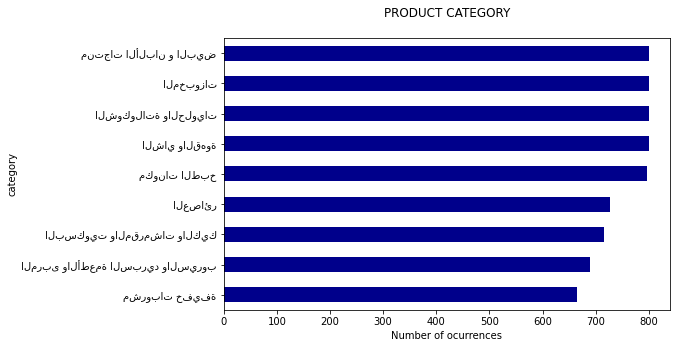

In [19]:
fig = plt.figure(figsize=(8,5))
colors = ['darkblue']
df.groupby('category').category.count().sort_values().plot.barh(
    ylim=0, color=colors, title= 'PRODUCT CATEGORY\n')
plt.xlabel('Number of ocurrences', fontsize = 10);

In [20]:
print(df.itemName.isna().unique())

[False]


# Model pipeline

In [21]:
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

X = df['itemName'] 
y = df['category'] # Target or the labels 


X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.3, random_state = 0, stratify=y)

bow_pipeline = Pipeline(
    steps=[
        ("tfidf", TfidfVectorizer()),
        ("classifier", svm.SVC(kernel='linear',probability=True)),
    ]
)
bow_pipeline.fit(X_train, y_train)
y_pred = bow_pipeline.predict(X_test)
print("model score: ", bow_pipeline.score(X_test, y_test))

model score:  0.8954857703631011


##### classification report

In [22]:
cr = classification_report(y_test, y_pred)

print(cr)

                                  precision    recall  f1-score   support

      البسكويت والمقرمشات والكيك       0.89      0.88      0.88       215
                   الشاي والقهوة       0.90      0.89      0.90       240
            الشوكولاتة والحلويات       0.84      0.92      0.88       240
                         العصائر       0.93      0.94      0.94       218
                       المخبوزات       0.85      0.78      0.81       240
المربى والأطعمة السبريد والسيروب       0.87      0.94      0.90       207
                   مشروبات خفيفة       0.89      0.83      0.86       199
                    مكونات الطبخ       0.94      0.92      0.93       239
          منتجات الألبان و البيض       0.95      0.95      0.95       240

                        accuracy                           0.90      2038
                       macro avg       0.90      0.90      0.89      2038
                    weighted avg       0.90      0.90      0.90      2038



##### confusion matrix

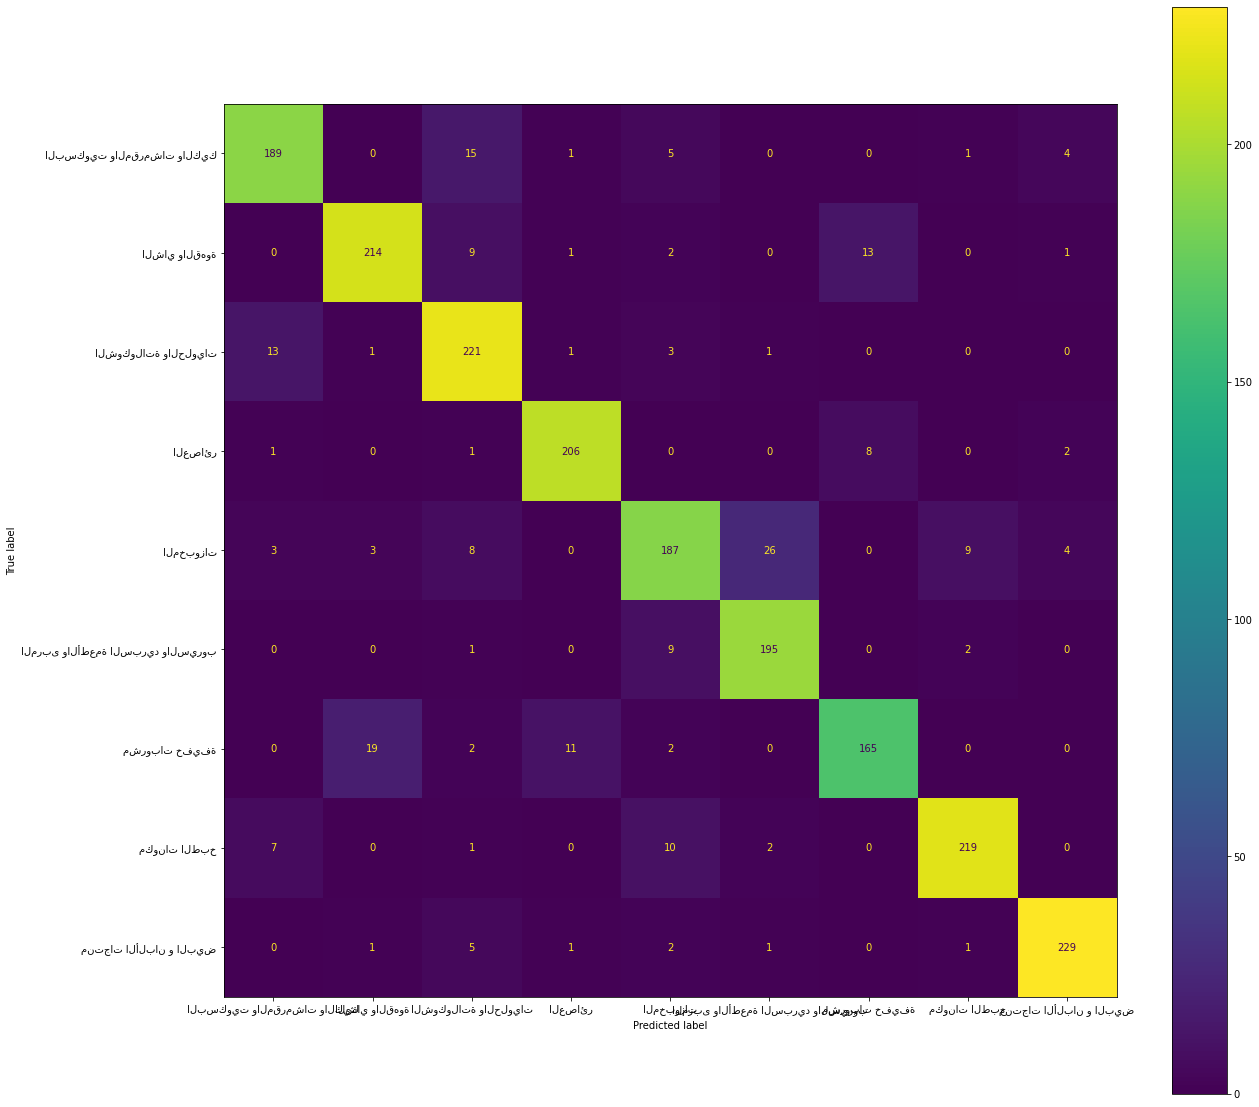

In [23]:
cm = confusion_matrix(y_test, bow_pipeline.predict(X_test), labels=bow_pipeline.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=bow_pipeline.classes_)
fig, ax = plt.subplots(figsize=(20,20))
disp.plot(ax=ax)

# Model Prediction

In [24]:
print(X_test[0:10])
print("------------------")
print(y_test[0:10])
print("------------------")
print(bow_pipeline.predict(X_test)[0:10])

640                        شاي اخضر سيكم بريميم - 25 فتلة
3155              الرشيدى الميزان حلاوة بالبندق، 300 جرام
896            نستله نسكافيه كابتشينو بالكراميل , 17 جرام
837                         ماك فيتس بسكويت دايجستف 250جم
4945               باربيكان شراب شعير 250 مللي كانز انواع
1384                       بيتى تروبيكانا عصير رمان 1 لتر
3137                           شاي تتلي اسود مركز 50 فتله
589     ويفر شوكولاتة نستله كيت كات كوكي مقرمش، 19.5 ج...
2177             كريمة لوتس البسكويت بسكوف الناعمة 400 جم
177        Happy Day Sweetened Condensed Milk - 397 grams
Name: itemName, dtype: object
------------------
640                        الشاي والقهوة
3155    المربى والأطعمة السبريد والسيروب
896                        الشاي والقهوة
837                 الشوكولاتة والحلويات
4945                       مشروبات خفيفة
1384                             العصائر
3137                       الشاي والقهوة
589                 الشوكولاتة والحلويات
2177                الشوكولاتة والحلويات
17

In [25]:
f1=open("pred_cat11.csv", "a+",  encoding = 'utf-8-sig')

for i, element in enumerate(X_test):
    predicted_cat= bow_pipeline.predict([element])
    f1.write("%s," % element)
    f1.write("%s," % predicted_cat)
    f1.write("\n")
    

    
for i in y_test:     
    f1.write(",,%s" % i)
    f1.write("\n")

f1.close()

In [26]:
import pickle
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(bow_pipeline, open(filename, 'wb'))
 


In [27]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))